In [56]:
# Import
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
# Load JSON
database_path = "../data/data.json"
data = pd.read_json(database_path)
# Select the columns needed for hard/soft skills analysis
data=data[['id','description', 'description_tokens']]
# Preview the Data
data.head()

,id,description,description_tokens
0,1,Open to work on W2 or on Corp-to-Corp (for vis...,"['qlik', 'power_bi', 'power_bi']"
1,2,Talentify helps candidates around the world to...,['excel']
2,3,"At Edward Jones, we help clients achieve their...","['sas', 'snowflake', 'excel', 'power_bi', 'pyt..."
3,4,Position Title\nPosition Number\nLocation...\n...,"['excel', 'tableau', 'cognos', 'sql', 'word']"
4,5,Scope of Position\n\nThe Pre-Construction Esti...,"['pandas', 'sql', 'tableau', 'word', 'power_bi..."


### Hard Skills Bar Chart

In [58]:
# Create dataframe for plotting showing the number and the percentage of job postings mentioning about each job skills
# count skill frequency from 'description_tokens' column
hs_freq = data['description_tokens'].str.split(r'[,\ \'\[\]]',expand=True).stack().value_counts()
hs_freq = hs_freq.drop(hs_freq.index[0])

# create dataframe for skill frequency plot (TOP 10 SKILLS)
hs_freq_df = hs_freq.to_frame().reset_index()
hs_freq_df.rename(columns = {'index':'hard_skills', 0:'count'}, inplace = True)

# Add a 'percentage' colomn showing the percentage of the job postings mentions about each job skills.
hs_perct = hs_freq_df['count']/len(data['id'])*100
hs_freq_df['hard_perct (%)']= hs_perct
hs_top_10_df = hs_freq_df.iloc[0:10]
hs_top_10_df

,hard_skills,count,hard_perct (%)
0,sql,5581,53.167572
1,excel,3764,35.857864
2,tableau,3077,29.313137
3,python,2955,28.150900
4,power_bi,2823,26.893398
5,r,1991,18.967324
6,sas,1134,10.803087
7,powerpoint,829,7.897495
8,word,787,7.497380
9,snowflake,761,7.249690


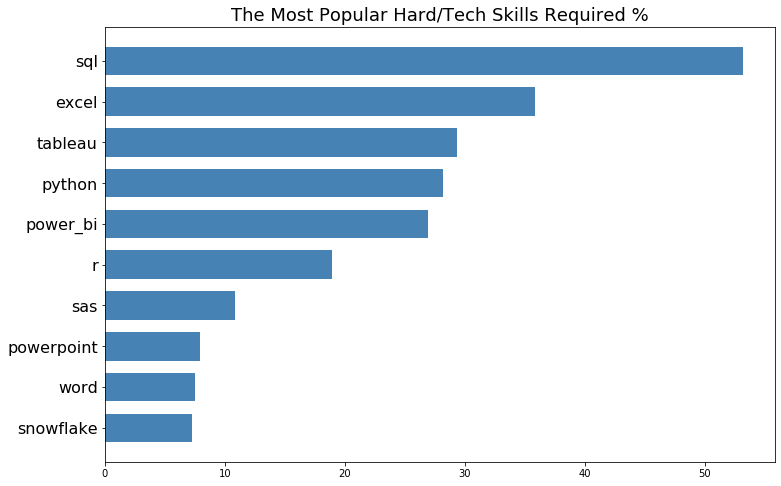

In [59]:
# Plot horizontal bar chart based on top 10 skills mentioend in the job posting following with a dataframe shows the ranking from 10-15.
# reverse the ranking
rev_hs_skill_top_10_df = hs_top_10_df.iloc[::-1]
y_axis = rev_hs_skill_top_10_df['hard_skills']
x_axis = rev_hs_skill_top_10_df['hard_perct (%)']
# labels = reversed_skill_top_10_df['percentage']
plt.figure(figsize = (12,8))
plt.barh(y_axis, x_axis, height=0.7, color="steelblue")
plt.title('The Most Popular Hard/Tech Skills Required %', fontsize=18)
plt.yticks(fontsize=16)
#plt.savefig('../images/hard_skill_bar.png')
plt.show()


### Soft Skills Bar Chart

In [60]:
#import
from nltk.tokenize import word_tokenize, MWETokenizer

In [61]:
# ChatGPT provided a list of most popular softskills in data anlyst job posting, going through description colomn and keep the word mentioend in the popular list.
softskill_keywords_all = ['communication','active_listening','writing','public_speaking','interpersonal_skills',\
'empathy','conflict_resolution','teamwork','collaboration','leadership','decision_making','problem_solving',\
'time_management','organized','attention_to_detail','creativity','adaptability','flexibility','resilience',\
'patience','positive_attitude','self_motivation','initiative','drive','accountability','responsibility',\
'trustworthiness','honesty','integrity','reliability','professionalism','cultural_sensitivity','diversity_and_inclusion',\
'networking','building_relationships','emotional_intelligence','critical_thinking','analytical skills','research_skills',\
'strategic_thinking','innovation','curiosity','learning_agility','risk_taking','negotiation','sales_skills','customer_service',\
'conflict_management','adaptation_to_change','coaching', 'mentoring','delegation','goal_setting',\
'customer_orientation','service_excellence','consensus_building','persuasion','creative_thinking','data_analysis',\
'detail_orientation','diplomacy','discretion','entrepreneurship','fiscal responsibility','foresight','cultural_awareness',\
'humility','influence','interpersonal_communication','intuition','judgment','logical_thinking','marketing_skills','multitasking',\
'oral_communication','organizational_skills','persuasiveness','presentation_skills','problem_solving skills','relationship_building',\
'resourcefulness','risk_management','salesmanship','self_awareness','self_discipline','self_esteem','self_management','social_awareness',\
'social_intelligence','strategic_planning','stress_management','time_management skills','tolerance','transparency',\
'understanding_of_group_dynamics','understanding_of_human_behavior','understanding_of_motivation','verbal_communication','vision','work_ethic']

# get a list of multi-word expression
MWE_list = []
for kw in softskill_keywords_all:
    temp = kw.split("_")
    if len(temp) == 1:
        continue
    MWE_list.append(tuple(temp))

print(MWE_list)

[('active', 'listening'), ('public', 'speaking'), ('interpersonal', 'skills'), ('conflict', 'resolution'), ('decision', 'making'), ('problem', 'solving'), ('time', 'management'), ('attention', 'to', 'detail'), ('positive', 'attitude'), ('self', 'motivation'), ('cultural', 'sensitivity'), ('diversity', 'and', 'inclusion'), ('building', 'relationships'), ('emotional', 'intelligence'), ('critical', 'thinking'), ('research', 'skills'), ('strategic', 'thinking'), ('learning', 'agility'), ('risk', 'taking'), ('sales', 'skills'), ('customer', 'service'), ('conflict', 'management'), ('adaptation', 'to', 'change'), ('goal', 'setting'), ('customer', 'orientation'), ('service', 'excellence'), ('consensus', 'building'), ('creative', 'thinking'), ('data', 'analysis'), ('detail', 'orientation'), ('cultural', 'awareness'), ('interpersonal', 'communication'), ('logical', 'thinking'), ('marketing', 'skills'), ('oral', 'communication'), ('organizational', 'skills'), ('presentation', 'skills'), ('problem

In [62]:
# create new column 'softskills_token' for tokenized soft skills
data['softskills_token'] = ""
for index, row in data.iterrows():
    # lowercase words
    detail = row.description.lower()
    # tokenize words
    detail = word_tokenize(detail)
    # handle multi-word tokenization
    tokenizer = MWETokenizer(MWE_list)
    detail = tokenizer.tokenize(detail)
    # remove duplicates
    detail = list(set(detail))
    # ChatGPT provided a list of most popular softskills in data anlyst job posting, going through description colomn and keep the word mentioend in the popular list.
    detail = [word for word in detail if word in softskill_keywords_all] 
    # add to details list
    data.loc[index, 'softskills_token'] = str(detail)

In [63]:
data.head(10)

,id,description,description_tokens,softskills_token
0,1,Open to work on W2 or on Corp-to-Corp (for vis...,"['qlik', 'power_bi', 'power_bi']","['writing', 'attention_to_detail', 'data_analy..."
1,2,Talentify helps candidates around the world to...,['excel'],"['integrity', 'judgment', 'critical_thinking',..."
2,3,"At Edward Jones, we help clients achieve their...","['sas', 'snowflake', 'excel', 'power_bi', 'pyt...","['presentation_skills', 'decision_making', 'dr..."
3,4,Position Title\nPosition Number\nLocation...\n...,"['excel', 'tableau', 'cognos', 'sql', 'word']","['integrity', 'data_analysis', 'customer_servi..."
4,5,Scope of Position\n\nThe Pre-Construction Esti...,"['pandas', 'sql', 'tableau', 'word', 'power_bi...","['time_management', 'teamwork', 'organizationa..."
5,6,You could be the one who changes everything fo...,"['python', 'power_bi']","['flexibility', 'leadership']"
6,7,Data analysis for clinical research original a...,[],['data_analysis']
7,8,Hybrid. Data Analysis role (Jr-Mid level neede...,[],['data_analysis']
8,9,"At Edward Jones, we help clients achieve their...",[],"['influence', 'vision', 'communication', 'inte..."
9,10,Talentify helps candidates around the world to...,['cognos'],"['integrity', 'curiosity', 'creativity', 'inte..."


In [64]:
# Create dataframe for plotting showing the number and the percentage of job postings mentioning about each job skills
# count skill frequency from 'description_tokens' column
ss_freq = data['softskills_token'].str.split(r'[,\ \'\[\]]',expand=True).stack().value_counts()
ss_freq = ss_freq.drop(ss_freq.index[0])

# create dataframe for skill frequency plot (TOP 10 SKILLS)
ss_freq_df = ss_freq.to_frame().reset_index()
ss_freq_df.rename(columns = {'index':'soft_skills', 0:'count'}, inplace = True)

# Add a 'percentage' colomn showing the percentage of the job postings mentions about each job skills.
soft_skill_perct = ss_freq_df['count']/len(data['id'])*100
ss_freq_df['soft_perct (%)']= soft_skill_perct
ss_top_15_df = ss_freq_df.iloc[0:15]
ss_top_15_df


,soft_skills,count,soft_perct (%)
0,data_analysis,3816,36.353244
1,communication,3766,35.876917
2,drive,2927,27.884157
3,leadership,2779,26.474231
4,vision,2492,23.740116
5,attention_to_detail,1453,13.842050
6,writing,1366,13.013242
7,integrity,1251,11.917691
8,collaboration,1030,9.812327
9,innovation,1021,9.726589


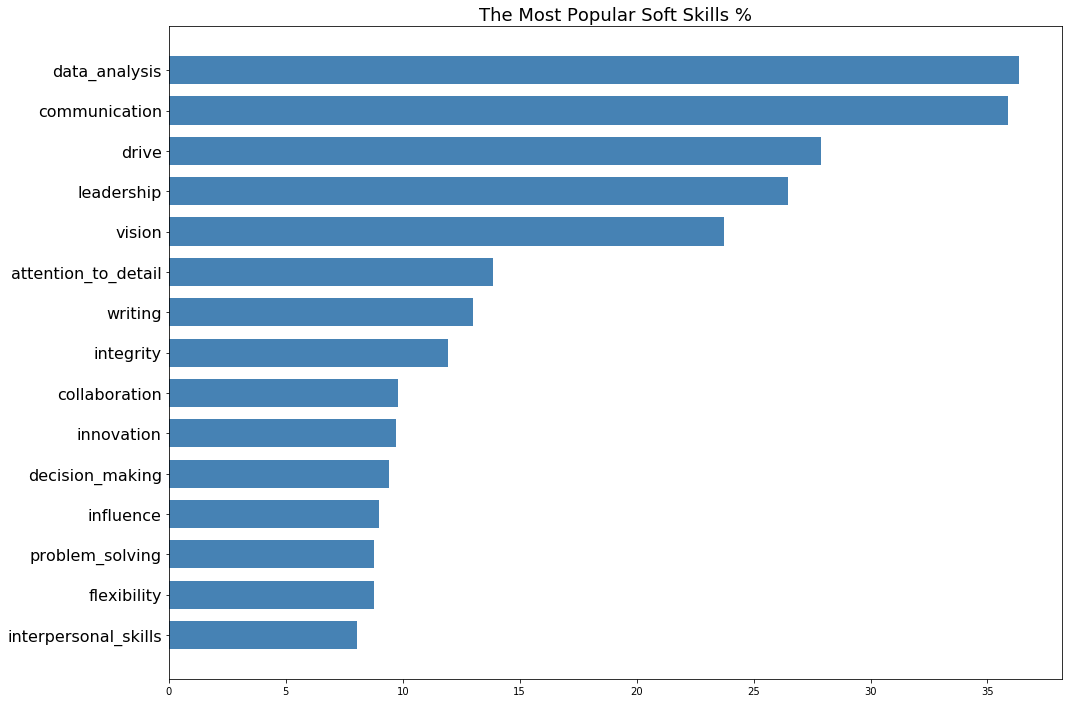

In [65]:
# Plot horizontal bar chart based on top 10 skills mentioend in the job posting following with a dataframe shows the ranking from 10-15.
# reverse the ranking
rev_ss_top_15_df = ss_top_15_df.iloc[::-1]
y_axis = rev_ss_top_15_df['soft_skills']
x_axis = rev_ss_top_15_df['soft_perct (%)']
# labels = reversed_skill_top_15_df['percentage']
plt.figure(figsize=(16,12))
plt.barh(y_axis, x_axis, height=0.7, color="steelblue")
plt.title('The Most Popular Soft Skills %', fontsize=18)
plt.yticks(fontsize=16)
#plt.savefig('../images/soft_skill_bar.png',bbox_inches = 'tight')
plt.show()

### WordCloud

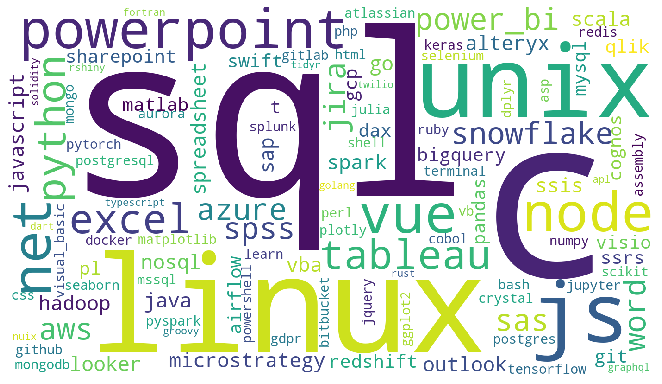

In [66]:
# Word cloud on hard skills 
# Imported wordcloud to generate wordcloud graph based on 'hard skills' column.
from wordcloud import WordCloud

comment_words = ''
 
# iterate through the 'hard_skills'column
for val in hs_freq_df['hard_skills']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1400, height = 800,
                background_color ='white',
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (9, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()
# save the image
#wordcloud.to_file('../images/hard_skill_wordcloud.png')

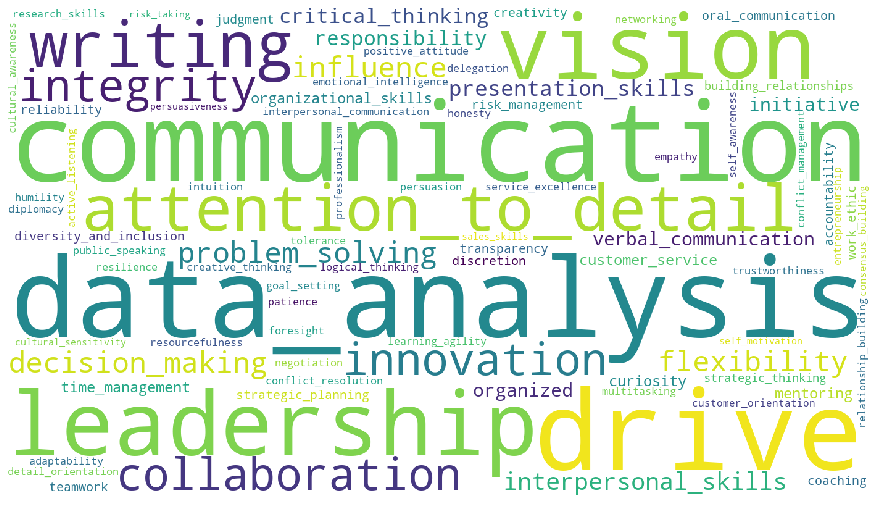

In [67]:
# Word cloud on soft skills 
# Imported wordcloud to generate wordcloud graph based on 'soft skills' column.
comment_words = ''
 
# iterate through the 'soft_skills'column
for val in ss_freq_df['soft_skills']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1400, height = 800,
                background_color ='white',
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (12, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()
# save the image
#wordcloud.to_file('../images/hard_skill_wordcloud.png')


### Soft SKills Bar Chart / xuan's approach

In [68]:
# import
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize, MWETokenizer
from nltk.stem import WordNetLemmatizer
import re
from collections import Counter

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/xuandi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/xuandi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [69]:
# Create a text file of all the description content and read it.
items = data['description'].tolist()
file = open("../data/description.txt",'w')
for item in items:
	file.write(item+"\n")
file.close()

# Open text file
with open("../data/description.txt") as f:
    text = f.read()

# Remove all punctuations from text file
text_without_punctuations = re.sub(r'[^\w\s]', '', text)

# Pass text after remvoing punctuations into word_tokenize() to return tokenized text. 
text_after_tokenizing = nltk.word_tokenize(text_without_punctuations)

# ChatGPT provided a list of most popular softskills in data anlyst job posting, going through description colomn and keep the word mentioend in the popular list.
softskill_keywords = (['communication','analytical','writing','organized','communication','empathy','teamwork','interpersonal','collaboration',\
        'collaborative','Strategic','leadership','innovative','creative','proactive','daptable','flexible','resourceful','resourceful','mentorship',\
        'coaching', 'influential','decisive','assertive','diplomatic','listening','patience','perseverance','teamwork','problemsolving' ])
text_with_softskill_keywords = [word for word in text_after_tokenizing if word in softskill_keywords]



# Handle multi-word tokenization
#tokenizer = MWETokenizer([('team', 'work')])
#text_token_combine = tokenizer.tokenize(text_without_punctuations)
#softskill_keywords = (['teamwork', 'team work', 'team-work'])
#text_with_softskill_keywords = [word for word in text_after_tokenizing if word in text_token_combine]


In [70]:
# Use Counter method find the frequency of words in sentences
from collections import Counter
softskill_count = Counter(text_with_softskill_keywords)

softskill_count_desc = sorted(softskill_count, key=softskill_count.get, reverse=True)
softskill_count_num_desc = sorted(softskill_count.items(), key=lambda pair: pair[1], reverse=True)

softskill_count_num_desc


[('analytical', 7726),
 ('communication', 5528),
 ('leadership', 3551),
 ('innovative', 2002),
 ('writing', 1584),
 ('flexible', 1560),
 ('collaborative', 1284),
 ('interpersonal', 1261),
 ('problemsolving', 1152),
 ('collaboration', 1016),
 ('creative', 656),
 ('organized', 438),
 ('proactive', 394),
 ('Strategic', 341),
 ('mentorship', 305),
 ('resourceful', 281),
 ('teamwork', 251),
 ('coaching', 215),
 ('listening', 143),
 ('empathy', 44),
 ('influential', 30),
 ('diplomatic', 16),
 ('patience', 9),
 ('decisive', 8),
 ('assertive', 8),
 ('perseverance', 5)]

In [71]:
import nltk
from nltk.probability import FreqDist
from nltk.tokenize import MWETokenizer

In [72]:
# This crazy list ChatGPT provided
softskill_keywords_all = ['communication','active_listening','writing','public_speaking','interpersonal_skills',\
'empathy','conflict_resolution','teamwork','collaboration','leadership','decision_making','problem_solving',\
'time_management','organization','attention_to_detail','creativity','adaptability','flexibility','resilience',\
'patience','positive_attitude','self_motivation','initiative','drive','accountability','responsibility',\
'trustworthiness','honesty','integrity','reliability','professionalism','cultural_sensitivity','diversity_and_inclusion',\
'networking','building_relationships','emotional_intelligence','critical_thinking','analytical skills','research_skills',\
'strategic_thinking','innovation','curiosity','learning_agility','risk_taking','negotiation','sales_skills','customer_service',\
'conflict_management','adaptation_to_change','coaching', 'mentoring','delegation','goal_setting',\
'customer_orientation','service_excellence','consensus_building','persuasion','creative_thinking','data_analysis',\
'detail_orientation','diplomacy','discretion','entrepreneurship','fiscal responsibility','foresight','cultural_awareness',\
'humility','influence','interpersonal_communication','intuition','judgment','logical_thinking','marketing_skills','multitasking',\
'oral_communication','organizational_skills','persuasiveness','presentation_skills','problem_solving skills','relationship_building',\
'resourcefulness','risk_management','salesmanship','self_awareness','self_discipline','self_esteem','self_management','social_awareness',\
'social_intelligence','strategic_planning','stress_management','time_management skills','tolerance','transparency',\
'understanding_of_group_dynamics','understanding_of_human_behavior','understanding_of_motivation','verbal_communication','vision','work_ethic']

# get a list of multi-word expression
mwe_list= [('active', 'listening'), ('public', 'speaking'), ('interpersonal', 'skills'), ('conflict', 'resolution'),\
     ('decision', 'making'), ('problem', 'solving'), ('time', 'management'), ('attention', 'to', 'detail'), ('positive', 'attitude'),\
        ('self', 'motivation'), ('cultural', 'sensitivity'), ('diversity', 'and', 'inclusion'), ('building', 'relationships'),\
            ('emotional', 'intelligence'), ('critical', 'thinking'), ('research', 'skills'), ('strategic', 'thinking'), ('learning', 'agility'), \
                ('risk', 'taking'), ('sales', 'skills'), ('customer', 'service'), ('conflict', 'management'), ('adaptation', 'to', 'change'),\
                     ('goal', 'setting'), ('customer', 'orientation'), ('service', 'excellence'), ('consensus', 'building'), ('creative', 'thinking'),\
                         ('data', 'analysis'), ('detail', 'orientation'), ('cultural', 'awareness'), ('interpersonal', 'communication'), ('logical', 'thinking'),\
                             ('marketing', 'skills'), ('oral', 'communication'), ('organizational', 'skills'), ('presentation', 'skills'), ('problem', 'solving skills'),\
                                 ('relationship', 'building'), ('risk', 'management'), ('self', 'awareness'), ('self', 'discipline'), ('self', 'esteem'), ('self', 'management'),\
                                     ('social', 'awareness'), ('social', 'intelligence'), ('strategic', 'planning'), ('stress', 'management'), ('time', 'management skills'),\
                                         ('understanding', 'of', 'group', 'dynamics'), ('understanding', 'of', 'human', 'behavior'), ('understanding', 'of', 'motivation'),\
                                              ('verbal', 'communication'), ('work', 'ethic')]


In [73]:
# Sample list of expressions to count

sample = ('we need someone to be good at teamwork and active listening, and someone with good communication skill and great public speaking skill as well.')

# Tokenize the text using MWETokenizer
tokenizer = MWETokenizer(mwe_list)
tokens = tokenizer.tokenize(nltk.word_tokenize(sample))

# Create a frequency distribution of the tokens
fdist = FreqDist(tokens)

# Count the occurrences of words and MWEs in the lists
word_counts = {word: fdist[word] for word in softskill_keywords_all}

print(word_counts)

{'communication': 1, 'active_listening': 1, 'writing': 0, 'public_speaking': 1, 'interpersonal_skills': 0, 'empathy': 0, 'conflict_resolution': 0, 'teamwork': 1, 'collaboration': 0, 'leadership': 0, 'decision_making': 0, 'problem_solving': 0, 'time_management': 0, 'organization': 0, 'attention_to_detail': 0, 'creativity': 0, 'adaptability': 0, 'flexibility': 0, 'resilience': 0, 'patience': 0, 'positive_attitude': 0, 'self_motivation': 0, 'initiative': 0, 'drive': 0, 'accountability': 0, 'responsibility': 0, 'trustworthiness': 0, 'honesty': 0, 'integrity': 0, 'reliability': 0, 'professionalism': 0, 'cultural_sensitivity': 0, 'diversity_and_inclusion': 0, 'networking': 0, 'building_relationships': 0, 'emotional_intelligence': 0, 'critical_thinking': 0, 'analytical skills': 0, 'research_skills': 0, 'strategic_thinking': 0, 'innovation': 0, 'curiosity': 0, 'learning_agility': 0, 'risk_taking': 0, 'negotiation': 0, 'sales_skills': 0, 'customer_service': 0, 'conflict_management': 0, 'adaptat

In [74]:
##This is the real content one, taking forever but no need to run the code it's not working correct anyways. 

# Tokenize the text using MWETokenizer
tokenizer = MWETokenizer(mwe_list)
#tokens = tokenizer.tokenize(nltk.word_tokenize(text))

# Create a frequency distribution of the tokens
fdist = FreqDist(tokens)

# Count the occurrences of words and MWEs in the lists
word_counts = {word: fdist[word] for word in softskill_keywords_all}

#print(word_counts)


In [77]:
# Used ChatGPT generated 100 most popular soft skills in data analyst job positings.

softskill_keywords_all = ['communication','active-listening','writing','public-speaking','interpersonal-skills',\
'empathy','conflict-resolution','teamwork','collaboration','leadership','decision-making','problem-solving',\
'time-management','organization','attention-to-detail','creativity','adaptability','flexibility','resilience',\
'patience','positive-attitude','self-motivation','initiative','drive','accountability','responsibility',\
'trustworthiness','honesty','integrity','reliability','professionalism','cultural-sensitivity','diversity-and-inclusion',\
'networking','building-relationships','emotional-intelligence','critical-thinking','analytical skills','research-skills',\
'strategic-thinking','innovation','curiosity','learning-agility','risk-taking','negotiation','sales-skills','customer-service',\
'conflict-management','adaptation-to-change','coaching', 'mentoring','delegation','goal-setting',\
'customer-orientation','service-excellence','consensus-building','persuasion','creative-thinking','data-analysis',\
'detail-orientation','diplomacy','discretion','entrepreneurship','fiscal responsibility','foresight','cultural-awareness',\
'humility','influence','interpersonal-communication','intuition','judgment','logical-thinking','marketing-skills','multitasking',\
'oral-communication','organizational-skills','persuasiveness','presentation-skills','problem-solving skills','relationship-building',\
'resourcefulness','risk-management','salesmanship','self-awareness','self-discipline','self-esteem','self-management','social-awareness',\
'social-intelligence','strategic-planning','stress-management','time-management skills','tolerance','transparency',\
'understanding-of-group-dynamics','understanding-of-human-behavior','understanding-of-motivation','verbal-communication','vision','work-ethic']
print(len(softskill_keywords_all))

100


In [76]:
['communication','active listening','writing','public speaking','interpersonal skills','empathy','conflict resolution','teamwork','collaboration','leadership','decision-making','problem-solving','time management','organization','attention to detail','creativity','adaptability','flexibility','resilience','patience','positive attitude','self-motivation','initiative','drive','accountability','responsibility','trustworthiness','honesty','integrity','reliability','professionalism','cultural sensitivity','diversity and inclusion','networking','building relationships','emotional intelligence','critical thinking','analytical skills','research skills','strategic thinking','innovation','curiosity','learning agility','risk-taking','negotiation','sales skills','customer service','conflict management','adaptation to change','coaching and mentoring','delegation','goal-setting','time-bound results orientation','customer orientation','service excellence','consensus-building','persuasion','creative thinking','data analysis','detail orientation','diplomacy','discretion','entrepreneurship','fiscal responsibility','foresight','cultural awareness','humility','influence','interpersonal communication','intuition','judgment','logical thinking','marketing skills','multitasking','oral communication','organizational skills','persuasiveness','presentation skills','problem-solving skills','relationship building','resourcefulness','risk management','salesmanship','self-awareness','self-discipline','self-esteem','self-management','social awareness','social intelligence','strategic planning','stress management','time management skills','tolerance','transparency','understanding of group dynamics','understanding of human behavior','understanding of motivation','verbal communication','vision','work ethic']

['communication',
 'active listening',
 'writing',
 'public speaking',
 'interpersonal skills',
 'empathy',
 'conflict resolution',
 'teamwork',
 'collaboration',
 'leadership',
 'decision-making',
 'problem-solving',
 'time management',
 'organization',
 'attention to detail',
 'creativity',
 'adaptability',
 'flexibility',
 'resilience',
 'patience',
 'positive attitude',
 'self-motivation',
 'initiative',
 'drive',
 'accountability',
 'responsibility',
 'trustworthiness',
 'honesty',
 'integrity',
 'reliability',
 'professionalism',
 'cultural sensitivity',
 'diversity and inclusion',
 'networking',
 'building relationships',
 'emotional intelligence',
 'critical thinking',
 'analytical skills',
 'research skills',
 'strategic thinking',
 'innovation',
 'curiosity',
 'learning agility',
 'risk-taking',
 'negotiation',
 'sales skills',
 'customer service',
 'conflict management',
 'adaptation to change',
 'coaching and mentoring',
 'delegation',
 'goal-setting',
 'time-bound results 